In [195]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [196]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [197]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [198]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [199]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [200]:
len(data)

149

In [201]:
data = data.reshape(len(data),7,6)  #  7 frames 不可随意更改

In [202]:
print(data[0])

[[  35.   65.  125.  -58. -181.  455.]
 [-161.  110.  -48.   31. -189.  480.]
 [-168.  151. -246.  190. -121.  457.]
 [ -73.  145. -171.  208.  -34.  359.]
 [ -40.  162.  -57.  190.  -20.  297.]
 [-146.  161. -283.  234.  -52.  392.]
 [-156.  114.  -54.    7. -123.  429.]]


In [203]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [204]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=0)
Y = np.delete(Y, 0, axis=0)

In [205]:
len(X)

148

In [206]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test[0]
Y_test=Y_test[0]

In [207]:
index = 0
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [208]:
X_test.shape

(7, 6)

### test

In [209]:
# X = np.array([[X[0]]])
# Y = np.array([[Y[0]]])
# X_test = X[0]
# Y_test = Y[0]

In [210]:
X.shape

(118, 7, 6)

### test end

In [215]:
for i in Y:
    if i.shape != (7, 6):
        print(i.shape)

In [217]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=500, batch_size=118, validation_data=(X, Y), verbose=1, shuffle=False)

# minimum_loss = float('inf')
# for epoch in range(2000):
    # for x, y in zip(X, Y):
    #     loss = model.train_on_batch(x, y)
    # print(epoch,end=': ')
    # l0.append(model.evaluate(X_test, Y_test))
    # if l0[-1] < minimum_loss:
    #         minimum_loss = l0[-1]
    #         model.save('best.h5')

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 51049.5156 - val_loss: 48728.1484
Epoch 2/500
1/1 [==============================] - 0s 63ms/step - loss: 48728.1484 - val_loss: 46823.4922
Epoch 3/500
1/1 [==============================] - 0s 81ms/step - loss: 46823.4922 - val_loss: 44992.3398
Epoch 4/500
1/1 [==============================] - 0s 41ms/step - loss: 44992.3398 - val_loss: 43399.7773
Epoch 5/500
1/1 [==============================] - 0s 44ms/step - loss: 43399.7773 - val_loss: 42018.9492
Epoch 6/500
1/1 [==============================] - 0s 48ms/step - loss: 42018.9492 - val_loss: 40534.6328
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 40534.6328 - val_loss: 39255.2070
Epoch 8/500
1/1 [==============================] - 0s 40ms/step - loss: 39255.2070 - val_loss: 37960.8711
Epoch 9/500
1/1 [==============================] - 0s 51ms/step - loss: 37960.8711 - val_loss: 36720.3477
Epoch 10/500
1/1 [==============================

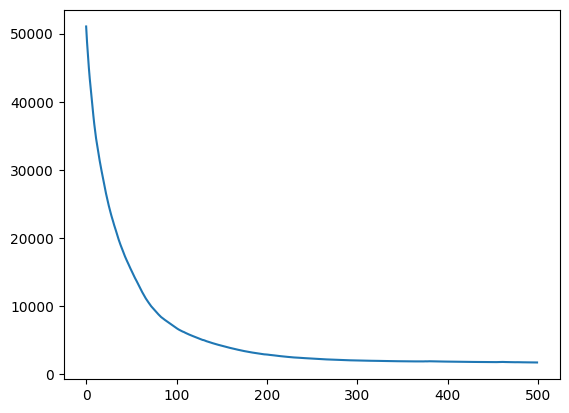

In [246]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
plt.plot(l)
plt.plot(l0)
plt.show()

In [ ]:
plt.plot(l0)

In [ ]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

In [ ]:
l0[-1]

In [218]:
model.save('last.h5')

/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [219]:
data[0]

array([[  35.,   65.,  125.,  -58., -181.,  455.],
       [-161.,  110.,  -48.,   31., -189.,  480.],
       [-168.,  151., -246.,  190., -121.,  457.],
       [ -73.,  145., -171.,  208.,  -34.,  359.],
       [ -40.,  162.,  -57.,  190.,  -20.,  297.],
       [-146.,  161., -283.,  234.,  -52.,  392.],
       [-156.,  114.,  -54.,    7., -123.,  429.]])

In [220]:
restore_changes(data[0],0,None)

[[[828.0, 635.0], [918.0, 512.0], [612.0, 1025.0]],
 [[625.0, 676.0], [738.0, 597.0], [597.0, 1046.0]],
 [[518.0, 740.0], [440.0, 779.0], [565.0, 1046.0]],
 [[488.0, 821.0], [390.0, 884.0], [527.0, 1035.0]],
 [[488.0, 880.0], [471.0, 908.0], [508.0, 1015.0]],
 [[449.0, 817.0], [312.0, 890.0], [543.0, 1048.0]],
 [[558.0, 689.0], [660.0, 582.0], [591.0, 1004.0]]]

In [221]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [222]:
# restore_changes(data[0],0)

In [225]:
model = tf.keras.models.load_model('last.h5')
# model.evaluate(X_test, Y_test)

In [240]:
a= model.predict(np.array([data[0]]))

1/1 [==============================] - 0s 36ms/step


In [241]:
a[0]

array([[  31.931398,   64.55461 ,   93.138824,  -17.91221 ,  -20.53082 ,
         470.01282 ],
       [-147.5102  ,  111.27696 ,  -34.024055,   34.837425, -134.20004 ,
         470.09738 ],
       [-154.51874 ,  143.33249 , -202.65381 ,  174.8937  ,  -90.70139 ,
         438.3262  ],
       [ -47.689217,  146.10486 , -145.74045 ,  233.45935 ,  -29.264729,
         337.82144 ],
       [ -38.321404,  156.5965  ,  -61.105385,  187.55156 ,   30.791729,
         311.86743 ],
       [-120.06795 ,  169.05203 , -234.1246  ,  241.50938 ,  -65.17732 ,
         396.8901  ],
       [-127.890274,  100.23996 ,  -28.364817,   64.5598  ,  -13.483738,
         411.5402  ]], dtype=float32)

In [242]:
data[0]

array([[  35.,   65.,  125.,  -58., -181.,  455.],
       [-161.,  110.,  -48.,   31., -189.,  480.],
       [-168.,  151., -246.,  190., -121.,  457.],
       [ -73.,  145., -171.,  208.,  -34.,  359.],
       [ -40.,  162.,  -57.,  190.,  -20.,  297.],
       [-146.,  161., -283.,  234.,  -52.,  392.],
       [-156.,  114.,  -54.,    7., -123.,  429.]])

In [245]:
points = restore_changes(a,0,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)